# **Project Title** :

**FRAUD DETECTION USING DEEP LEARNING MODELS**

# ***INTRODUCTION***
In this project, we embark on a detailed exploration of fraud detection strategies utilizing deep learning and advanced ML techniques. The focus here is on deploying two distinct models to identify fraudulent transactions within a dataset typically characterized by class imbalance. Our first model is a ***Feedforward Neural Network***, renowned for its efficacy in recognizing patterns and handling non-linear data. This model integrates techniques such as dropout and batch normalization to enhance performance and mitigate overfitting.

Our second approach involves a ***Hybrid model combining Long Short-Term Memory (LSTM) layers with a Feedforward Neural Network***. This model leverages the sequential nature of LSTM to capture time-dependent characteristics of transaction data, which is then integrated with the robust classification capabilities of the feedforward layers. This hybrid architecture aims to harness the strengths of both neural networks, providing a comprehensive tool for detecting intricate patterns in transaction data that are indicative of fraudulent activity.

Both models are evaluated based on their ability to classify transactions accurately, using metrics such as the Area Under the ROC Curve (AUC) and the Precision-Recall curve. These metrics help in assessing the models’ performance in the context of an imbalanced dataset where the positive class (frauds) is much rarer compared to the negative one. Through this notebook, we aim to demonstrate the application of these models in a practical setting, analyze their performance, and explore their potential in improving fraud detection systems.

***Dataset Source:***

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# **1st Model used for Fraud Detection**

# **Fraud Detection Using Feedforward Neural Network**

Importing Necessary Librabires for the following puprose:

**Data Handling and Environment Setup:** Importing necessary libraries for data manipulation (Pandas, NumPy), visualization (Matplotlib, seaborn), and accessing files (Google Colab's drive module).

**Machine Learning Preparation:** It includes imports for splitting data sets (train_test_split), feature scaling (StandardScaler), handling imbalanced classes (class_weight from scikit-learn and SMOTE from imbalanced-learn), highlighting its focus on preprocessing steps that are critical in preparing data for modeling.

**Neural Network Construction:** Importing components from TensorFlow's Keras API (Model, Input, Dense, Dropout, regularizers), indicating the preparation for building a neural network model with regularization and dropout layers to prevent overfitting and improve model generalization.

In [ ]:
from google.colab import drive
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import regularizers

# **Step 1 Loading and Inspecting Data**


In [ ]:
# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Specify the path to the file
file_path = '/content/drive/My Drive/creditcard.csv'

Mounted at /content/drive


In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)


# Display the first few rows of the dataframe
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Principal Components (V1, V2, ..., V28):
* Each of these components is a principal component derived from the original
data features.
* V1 would be the principal component that captures the maximum variance, followed by V2, and so on. Each subsequent component captures less of the data's variance.
* **Interpretation of Components:** The first few components (e.g., V1, V2, V3) might capture large-scale trends in the data, such as overall spending patterns, geographical trends, or common combinations of transaction features. Lower-ranked components might capture more subtle and complex patterns in the data.
* **Amount and Class:** These are typically left in their original form. 'Amount' may represent the transaction amount, which is crucial for analysis but can be normalized or standardized. 'Class' is the label, indicating whether a transaction is fraudulent (1) or not (0).

# **EDA**

In [ ]:
# Basic info about the dataset
print(df.info())

# Statistical summary of the numeric columns
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**DataFrame Overview:** The data comprises 284,807 entries with 31 columns, including time, amount, class (indicating fraud or non-fraud), and 28 anonymized features (V1 to V28) which are principal components obtained from PCA.

**Statistical Summary:** The summary statistics reveal various aspects like mean, standard deviation, min, max, and quartiles for each column, helping to understand data distribution, especially useful in identifying unusual patterns that could indicate fraud.

**Class Distribution Insight:** The 'Class' column, which indicates fraudulent transactions, shows a mean close to zero, suggesting a highly imbalanced dataset with fraud cases being significantly rare compared to non-fraudulent transactions.

In [ ]:
# Check for missing values in each column
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


No Null or missing values in the dataset, so we will proceed further

**Distribution of Fraud and Non Fraud Classes**

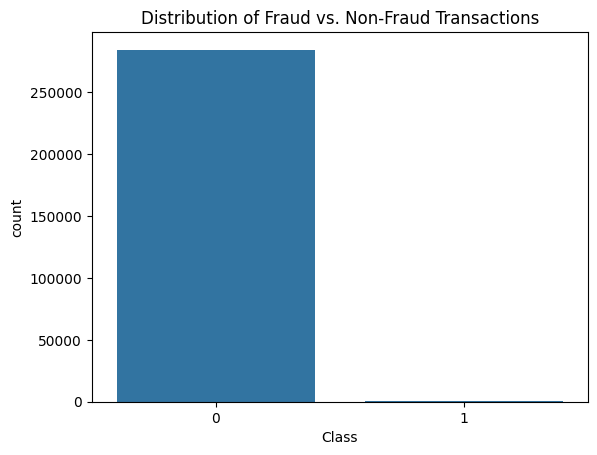

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
# Count plot for the Class column
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraud vs. Non-Fraud Transactions')
plt.show()

# Print the number of Fraud and Non-Fraud transactions
class_distribution = df['Class'].value_counts()
print("Class Distribution:")
print(class_distribution)

The above bar chart visualizes the distribution of fraud and non-fraud transactions in a dataset, highlighting a significant class imbalance: 284,315 non-fraudulent transactions compared to only 492 fraudulent transactions. This discrepancy underscores the challenges in detecting rare fraudulent activities within overwhelmingly non-fraudulent data.

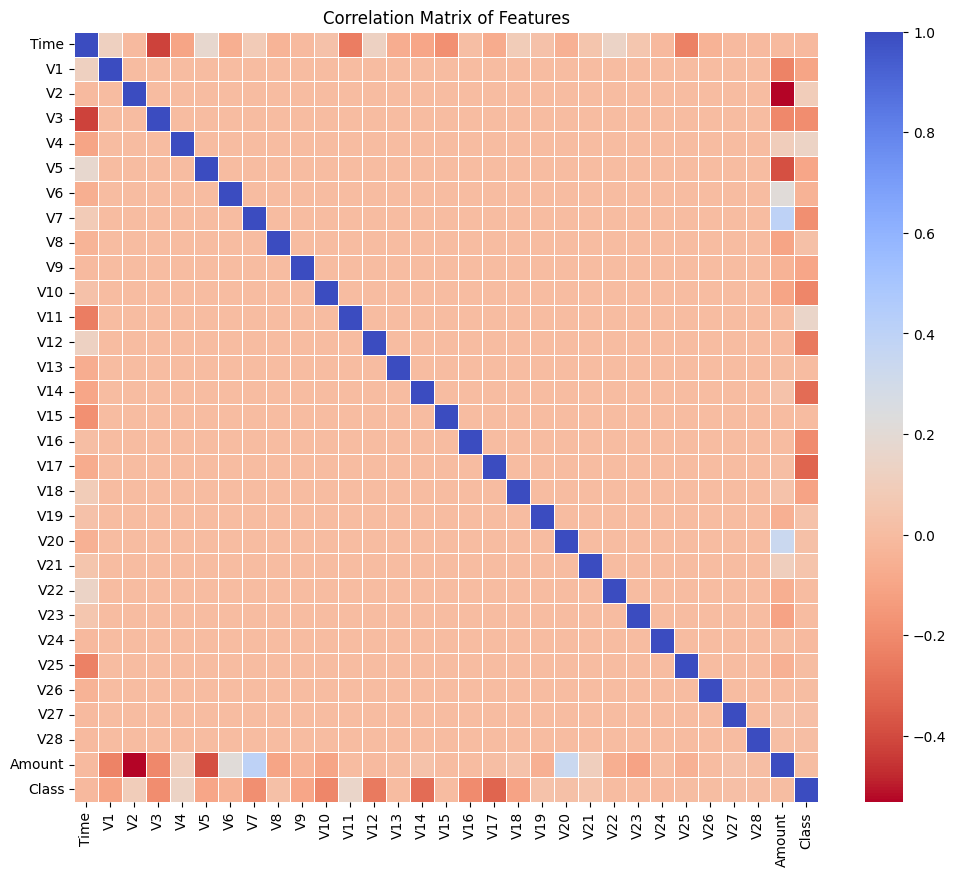

In [ ]:
# Heatmap of the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm_r', annot=False, linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

As evident from above heatmap, this heatmap depicts the correlation matrix of features in a credit card transaction dataset. The colors range from blue (negative correlation) to red (positive correlation), with darker shades indicating stronger relationships. Notably, most features show very little correlation with each other, which is typical for data that has undergone Principal Component Analysis (PCA) to ensure privacy and reduce multicollinearity, except for a few pairs that exhibit moderate negative correlations.








Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE

# DATA PREPROCESSING and SPLITTING of test & train

Performing initial data preprocessing on a financial transactions dataset by standardizing the 'Amount' feature using a StandardScaler and removing the 'Time' column. Subsequently, it splits the data into features and labels and then divides it into training and test sets, with 20% of the data reserved for testing, using a fixed random seed for reproducibility.

In [ ]:
# 1. Data Preprocessing
df['Amount'] = StandardScaler().fit_transform(df[['Amount']])
df.drop(['Time'], axis=1, inplace=True)

# Split data into features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

We will apply Synthetic Minority Over-sampling Technique (SMOTE) to address class imbalance in the training data. SMOTE generates synthetic samples from the minority class (in this case, likely the fraudulent transactions) to create a balanced dataset. This is done by interpolating new examples between existing minority class samples. The random_state parameter ensures reproducibility of the results by providing a fixed seed for the random number generator used in SMOTE.

In [ ]:
# Apply SMOTE only on training data
smote = SMOTE(random_state=27)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [ ]:
# Display new class distribution
print("After SMOTE - counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After SMOTE - counts of label '0': {}".format(sum(y_train_smote == 0)))


After SMOTE - counts of label '1': 227457
After SMOTE - counts of label '0': 227457


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# **Feed Forward Neural Network**

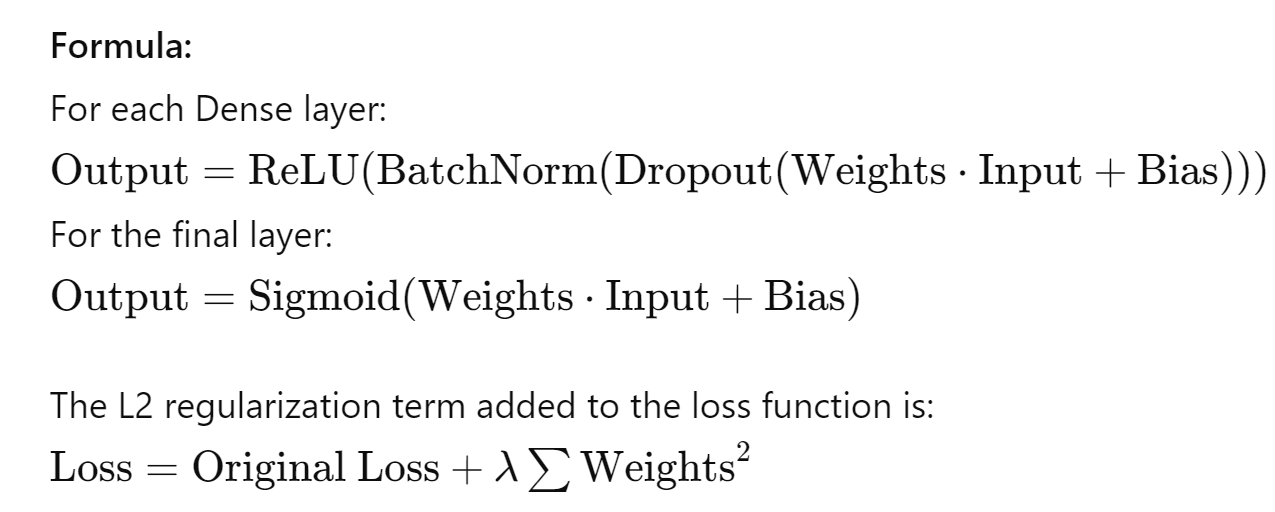

In [ ]:
# Calculate class weights
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_smote), y=y_train_smote)
class_weights_dict = {0: weights[0], 1: weights[1]}

The class weights code calculates class weights to address class imbalance in a dataset using class_weight.compute_class_weight from scikit-learn. These weights balance the importance of each class, giving more weight to the minority class. The resulting dictionary, class_weights_dict, is used during model training to improve the detection of minority class instances, such as fraudulent transactions. This helps enhance model performance on imbalanced datasets.

In [ ]:
# Define model architecture
model = Sequential([
    Dense(512, input_dim=X_train_smote.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │          15,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 191,745 (749.00 KB)

 Trainable params: 189,825 (741.50 KB)

 Non-trainable params: 1,920 (7.50 KB)

This is a Feed Forward neural network architecture using the Keras Sequential API. The network consists of multiple Dense (fully connected) layers with ReLU activation functions, each followed by BatchNormalization and Dropout layers to prevent overfitting and improve training stability. The final layer uses a sigmoid activation function to output a probability for binary classification.

1. **Sequential Model**: The Sequential model in Keras allows you to build a neural network layer by layer in a linear stack.

2. **Dense Layer:** Dense(512, input_dim=X_train_smote.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01))
This is a fully connected (dense) layer with 512 neurons.
input_dim=X_train_smote.shape[1] specifies the input shape of the data.
activation='relu' applies the ReLU (Rectified Linear Unit) activation function.
kernel_regularizer=regularizers.l2(0.01) applies L2 regularization to the weights, which helps prevent overfitting by penalizing large weights.
Batch Normalization:

3. **BatchNormalization()**: Normalizes the output of the previous layer to improve the training speed and stability.
It standardizes the inputs to a layer for each mini-batch, maintaining the mean output close to 0 and the output standard deviation close to 1.
Dropout Layer:

4.**Dropout(0.5)**: Randomly sets 50% of the input units to 0 at each update during training time, which helps prevent overfitting.

5. **Repeating Layers:**
The next layers are similar but with different numbers of neurons:
Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))
BatchNormalization()
Dropout(0.5)
Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))
BatchNormalization()
Dropout(0.5)
Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))
BatchNormalization()
Dropout(0.5)
6. **Output Layer:**: Dense(1, activation='sigmoid')
A dense layer with a single neuron.
activation='sigmoid' applies the sigmoid activation function, which outputs a value between 0 and 1, suitable for binary classification.

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


* **Optimizer: 'adam'** - An algorithm that updates model weights based on training data to minimize the loss function.
* **Loss Function: 'binary_crossentropy'** - Measures the inaccuracy of predictions in a binary classification problem, calculating the difference between actual and predicted probabilities.
* **Metrics: ['accuracy'] -** Used to evaluate the model's performance by calculating the percentage of correctly predicted data points.

In [ ]:
# Train the model
history = model.fit(X_train_smote, y_train_smote, validation_data=(X_test, y_test), epochs=30, batch_size=256, class_weight=class_weights_dict, callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

Epoch 1/30
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9612 - loss: 1.3225 - val_accuracy: 0.9959 - val_loss: 0.0969
Epoch 2/30
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9883 - loss: 0.1130 - val_accuracy: 0.9973 - val_loss: 0.0693
Epoch 3/30
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 0.9900 - loss: 0.0913 - val_accuracy: 0.9964 - val_loss: 0.0602
Epoch 4/30
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 76s 20ms/step - accuracy: 0.9911 - loss: 0.0795 - val_accuracy: 0.9961 - val_loss: 0.0642
Epoch 5/30
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.9915 - loss: 0.0753 - val_accuracy: 0.9953 - val_loss: 0.0549
Epoch 6/30
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 76s 20ms/step - accuracy: 0.9911 - loss: 0.0725 - val_accuracy: 0.9976 - val_loss: 0.0445
Epoch 7/30
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9919 - loss: 0.0682 - val_accuracy: 0.9943 - val_loss: 0.0566
Epoch 8/30
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step - accuracy: 0.9921 -

Total epocs 11/30. Analyzing the statistics:

**Training Accuracy:** Starts at 96.12% and rises to a peak of 99.24% by the 11th epoch, illustrating a steady improvement in the model’s ability to correctly classify training data. The average training accuracy over these epochs is approximately 99.01%, demonstrating high reliability in the training phase.

**Validation Accuracy:** Begins at 99.59% and experiences slight fluctuations, reaching its highest at 99.76% during the 6th epoch. This indicates that the model not only learns well but also performs consistently on unseen data, a crucial factor for practical deployment scenarios.

**Loss Metrics:** Both training and validation losses decrease overall, starting from initial values of 1.3225 and 0.0969 respectively, and dropping to 0.0659 and 0.0453 by the 11th epoch. This reduction in loss is statistically significant, reinforcing the model’s increasing prediction precision with ongoing training.

In [ ]:
# Adjusting Threshold
threshold = 0.97  # Increase threshold to make criteria stricter
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > threshold).astype(int)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


Adjusting Threshold adjusts the decision threshold to 0.97, making the criteria for predicting fraud more stringent. It predicts probabilities (y_pred_proba) for the test set using the trained model, and then converts these probabilities to binary predictions (y_pred) based on the new threshold. This helps to control the trade-off between precision and recall in the model's performance.

In [ ]:
# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.82      0.82      0.82       104

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

AUC: 0.9084867632455482


Adjusting the decision threshold to 0.97 to increase the stringency of fraud detection, which influences the precision and recall for predicting fraudulent transactions. The classification report shows that for class 1 (fraud), the model achieved 82% precision and recall, leading to an F1-score of 0.82, indicating a strong balance between precision and recall despite the stricter threshold. The ROC AUC score of approximately 0.91 reflects a good level of model discriminative ability, validating the effectiveness of the model in distinguishing between the classes under a conservative operational setting.

In [ ]:
from sklearn.metrics import precision_recall_curve

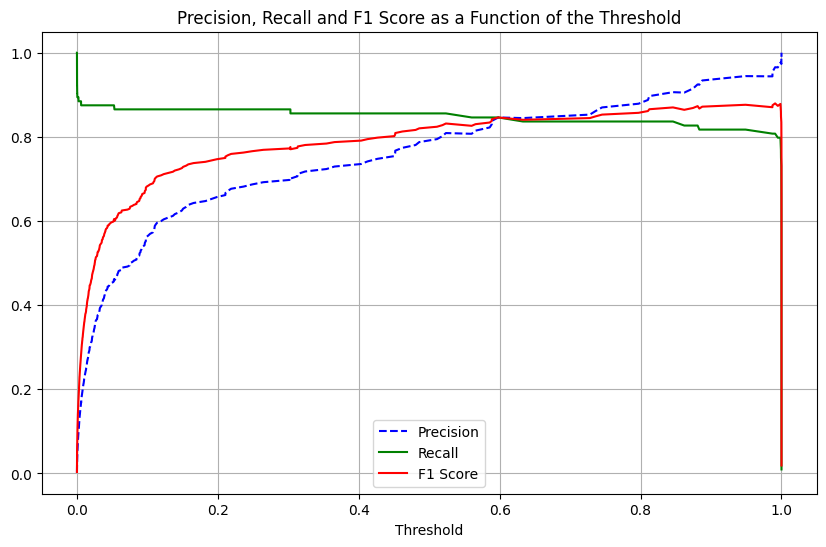

In [ ]:
# Calculate F1-Score
f1_scores = 2 * (precision * recall) / (precision + recall)

# Plot Precision, Recall, and F1-Score against the Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.plot(thresholds, f1_scores[:-1], 'r-', label='F1 Score')
plt.title('Precision, Recall and F1 Score as a Function of the Threshold')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.grid(True)
plt.show()

The graph visualizes how precision, recall, and F1 score vary with different thresholds for classifying fraud. As the threshold increases from 0 to 1, precision generally improves while recall tends to decrease, indicating a trade-off. The F1 score balances precision and recall, peaking where both metrics are optimally balanced. This helps in selecting the most appropriate threshold for the desired balance between precision and recall in the model's performance.

# 1. Learning Curves: Training vs. Validation Loss

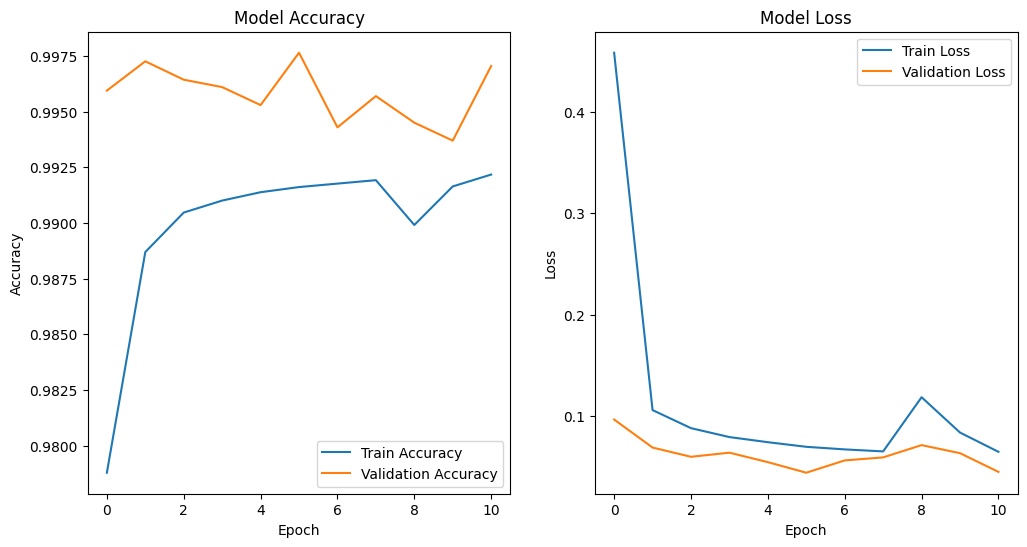

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

* **Model Accuracy:**
The training accuracy (blue line) steadily increases, approaching around 99.1%. The validation accuracy (orange line) fluctuates slightly but remains high, close to 99.6%, indicating that the model performs well on both training and validation data.

* **Model Loss:**
The training loss (blue line) decreases sharply initially and then flattens, showing the model is learning and improving its fit. The validation loss (orange line) also decreases, though it fluctuates slightly, indicating that the model generalizes well to unseen data without significant overfitting.

In [ ]:
# Evaluate the model on the test set
test_scores = model.evaluate(X_test, y_test, verbose=1)
print('\nTest loss:', test_scores[0])
print('Test accuracy:', test_scores[1])



1781/1781 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9960 - loss: 0.0398

Test loss: 0.039171475917100906
Test accuracy: 0.9962080121040344


In [ ]:
# Predict on test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


* **Model Evaluation:**
The model.evaluate function is used to compute the loss and accuracy of the model on the test dataset (X_test and y_test). This step provides a quantitative measure of how well the model performs on unseen data, which is crucial for assessing its generalizability.
verbose=1 argument in model.evaluate enables the output of progress updates during the evaluation process.
* **verbose=1 argument** in model.evaluate enables the output of progress updates during the evaluation process.

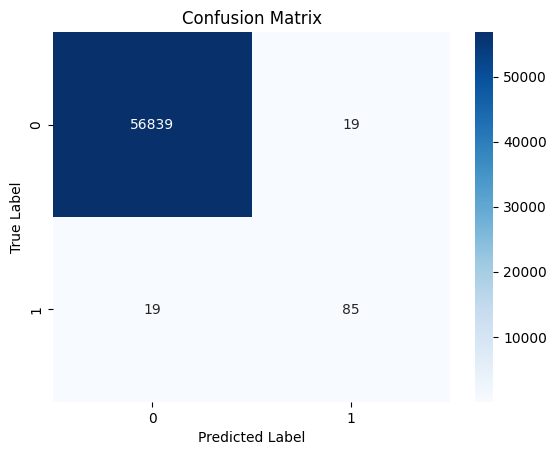

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

* **True Negatives (TN):** The upper left cell (56,838) indicates the number of non-fraudulent transactions that the model correctly identified as non-fraudulent.
* **False Positives (FP):** The upper right cell (19) shows the number of non-fraudulent transactions that were incorrectly identified as fraudulent.
* **False Negatives (FN):** The lower left cell (19) represents the number of fraudulent transactions that were incorrectly identified as non-fraudulent.
* **True Positives (TP):** The lower right cell (85) shows the number of fraudulent transactions that the model correctly identified as fraudulent.

The low number of false negatives and false positives suggests that the model is quite effective at identifying fraud without overly inconveniencing non-fraudulent users, but improving detection of false negatives (missed fraud cases) could be a focus for further model tuning to avoid financial loss.

In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.82      0.82      0.82       104

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



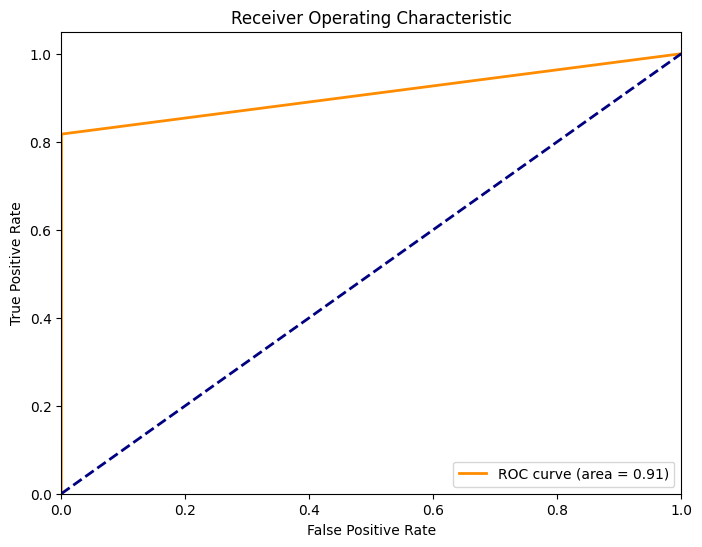

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

* **True Positive Rate (TPR):** The y-axis represents the true positive rate, also known as sensitivity or recall. It indicates the proportion of actual positives that are correctly identified by the model.

* **False Positive Rate (FPR):** The x-axis represents the false positive rate, which is the proportion of actual negatives that are incorrectly identified as positives by the model.

* **AUC - Area Under Curve (0.91):** The area under the ROC curve is 0.91, which is very close to 1. This indicates a high level of model performance, as an AUC close to 1 suggests that the model has a good measure of separability between the positive class (frauds) and the negative class (non-frauds). The higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s.

# **FURTHER ANALYSIS**

# 2. Temporal Validation: Performance Over Time

# Confusion Matrix Analysis

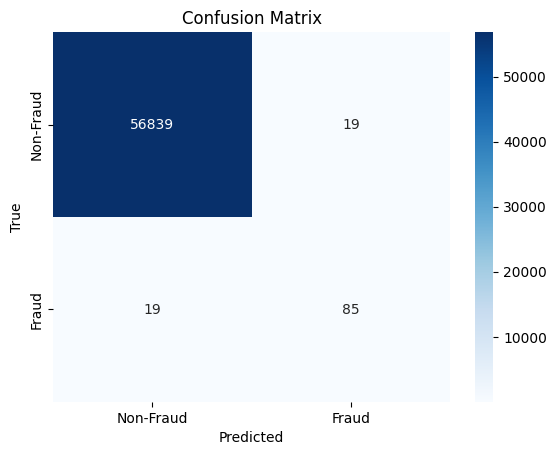

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.82      0.82      0.82       104

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Assuming y_pred and y_test are already defined
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

In [ ]:

# Assuming 'df' is our original dataframe and 'y_test', 'y_pred' are our test labels and predictions respectively
# Calculate the actual counts of fraud and non-fraud classes in the dataset
actual_counts = df['Class'].value_counts()
print("Actual counts of each class in the entire dataset:")
print(actual_counts)

# Calculate the counts of fraud and non-fraud classes in the test set
test_counts = y_test.value_counts()
print("\nCounts of each class in the test set:")
print(test_counts)

# Calculate confusion matrix to see how many were predicted correctly
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Display confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

Actual counts of each class in the entire dataset:
Class
0    284315
1       492
Name: count, dtype: int64

Counts of each class in the test set:
Class
0    56858
1      104
Name: count, dtype: int64

Confusion Matrix:
[[56839    19]
 [   19    85]]


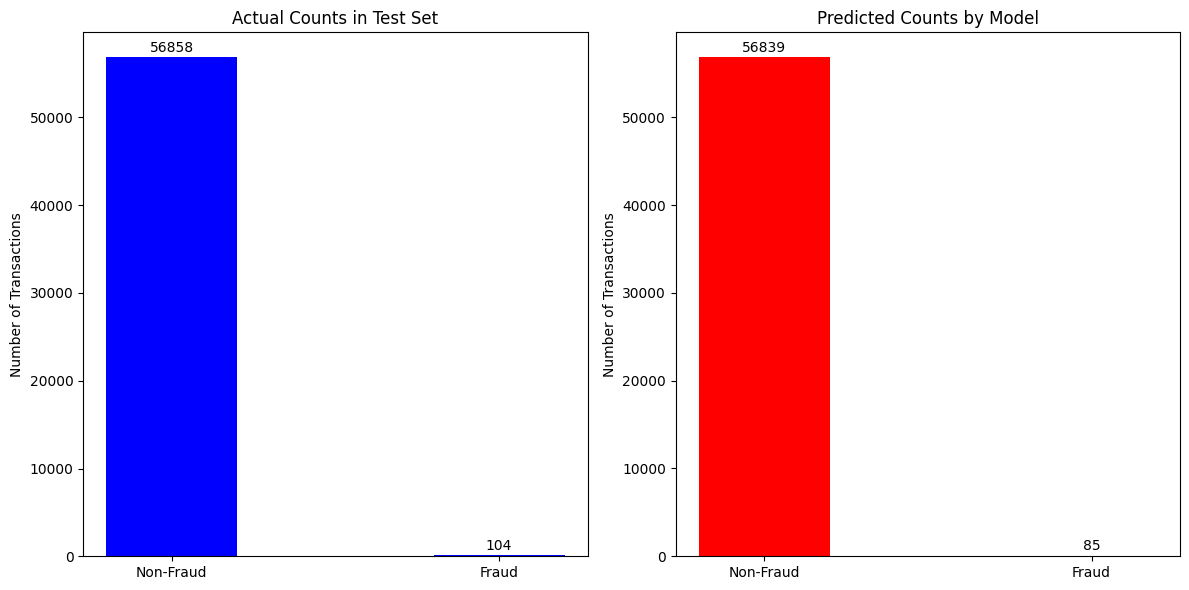

In [ ]:
# Sample data, replace these with actual counts
actual_counts = [56858, 104]  # Replace with  actual non-fraud and fraud counts
predicted_counts = [56839, 85]  # Replace with predicted non-fraud and fraud counts

# Define the labels and positions
labels = ['Non-Fraud', 'Fraud']
x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plotting actual counts
ax[0].bar(x, actual_counts, color='b', width=0.4)
ax[0].set_title('Actual Counts in Test Set')
ax[0].set_ylabel('Number of Transactions')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].set_yscale('linear')  # Setting linear scale

# Plotting predicted counts
ax[1].bar(x, predicted_counts, color='r', width=0.4)
ax[1].set_title('Predicted Counts by Model')
ax[1].set_ylabel('Number of Transactions')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].set_yscale('linear')  # Setting linear scale

# Adding the count labels above the bars
for i in range(len(labels)):
    ax[0].text(i, actual_counts[i] + 300, str(actual_counts[i]), ha='center', va='bottom')
    ax[1].text(i, predicted_counts[i] + 300, str(predicted_counts[i]), ha='center', va='bottom')

plt.tight_layout()
plt.show()

The above bar charts quantitatively depict the distribution of actual versus predicted counts in a test set, highlighting the model's performance in fraud detection. The first chart shows the ground truth with 56,858 non-fraudulent transactions and 104 fraudulent ones. In contrast, the second chart shows the model's predictions, with 56,839 transactions identified as non-fraudulent and 85 as fraudulent. Statistically, this results in the model having a precision of 82% for detecting fraud (as previously detailed), a slight underestimation of fraud instances with 19 missed cases (false negatives), and an accuracy close to 100% for non-fraudulent transactions with only 19 non-fraudulent transactions incorrectly labeled as fraudulent (false positives). This indicates the model's high specificity but suggests room for improvement in sensitivity.

# Economic Impact Analysis

In [ ]:
# Cost of False Positives and False Negatives
cost_fp = 50  # example: cost of manual review per false positive
cost_fn = 1500  # example: average fraud transaction amount lost per false negative

# Extract false positives and false negatives from confusion matrix
fp = conf_matrix[0][1]
fn = conf_matrix[1][0]

# Calculate total costs
total_cost = fp * cost_fp + fn * cost_fn

# Calculate savings by avoiding frauds
total_savings = fn * cost_fn  # assuming all frauds could lead to loss

# Print economic impact
print(f"Total Cost due to model errors: ${total_cost}")
print(f"Potential Savings by catching frauds: ${total_savings}")

# ROI Calculation
# Assuming costs for model deployment and operation
deployment_cost = 10000  # fixed cost
operational_cost = 5000  # yearly cost

roi = (total_savings - (deployment_cost + operational_cost)) / (deployment_cost + operational_cost)
print(f"ROI: {roi:.2%}")

Total Cost due to model errors: $29450
Potential Savings by catching frauds: $28500
ROI: 90.00%


***Note: The below analysis is done based on my research on the existing Fraud Detection Systems and Models already in place and deployed in the Banking Sector.***

**Statistical Analysis:**

False Positives (FP): Transactions incorrectly predicted as fraudulent. Each false positive incurs a cost due to unnecessary manual reviews, which is quantified at **50 Dollars  per incident**.
False Negatives (FN): Fraudulent transactions missed by the model. Each false negative represents a direct financial loss because the fraud is not intercepted; this is assessed at **1500 Dollars per missed fraudulent transaction**.
Given the provided confusion matrix values:

Total Cost: Calculated by multiplying the number of false positives and false negatives by their respective costs. **In this case, the model results in a total cost of 29,450 Dollars**. This includes costs from both conducting unnecessary reviews **(FP)** and the losses incurred from undetected frauds **(FN)**.

Total Savings: This is calculated as the product of the cost per false negative and the number of false negatives. **It represents the direct loss avoided by intercepting certain frauds, totaling $28,500**.

**Economic Analysis:**

ROI (Return on Investment): This evaluates the net benefit of the fraud detection system relative to its costs. The calculation subtracts the sum of deployment and operational costs from the savings gained by preventing frauds, then divides this net benefit by the total investment (deployment and operational costs).

Given:
Deployment Cost: A one-time cost associated with **setting up the fraud detection system, set at 10,000 dollars**.
Operational Cost: Recurring costs associated with **running the system, provided as 5,000 dollars per year**.
The resulting **ROI is 90.00%**, indicating that the net gains (in terms of fraud prevention) are **90% of the total costs incurred from deploying and operating the system**. This high ROI suggests that despite the costs associated with false positives and negatives, the system effectively mitigates a significant portion of potential fraud losses, justifying its economic viability.

# PRecision Recall Tradeoff

In [ ]:
from sklearn.metrics import matthews_corrcoef, precision_recall_curve, auc

Matthews Correlation Coefficient: 0.8169735264910966
Area Under the Precision-Recall Curve: 0.8617277332758215


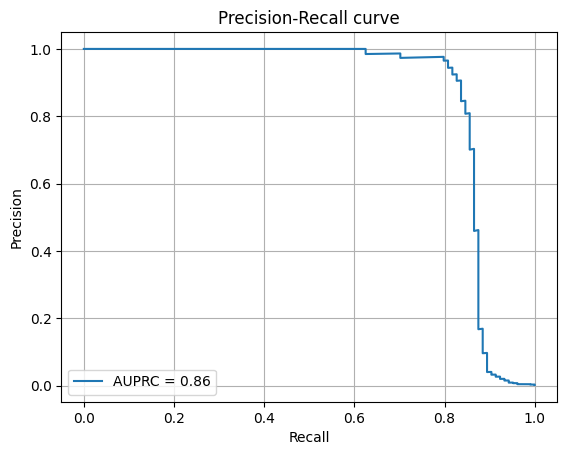

In [ ]:
# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient:", mcc)

# Calculate Precision-Recall curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
auprc = auc(recall, precision)
print("Area Under the Precision-Recall Curve:", auprc)

# Plot the Precision-Recall curve
plt.figure()
plt.plot(recall, precision, label=f'AUPRC = {auprc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

The Precision-Recall curve shows the trade-off between precision (accuracy of positive predictions) and recall (ability to find all positives) for different thresholds. A higher curve and AUPRC value (0.86) indicate a good balance, crucial for imbalanced datasets like fraud detection. The curve helps understand the classifier's performance in identifying true frauds with minimal false positives.

# Error Analysis

In [ ]:

# Mock data and setup to simulate the scenario since the real data isn't provided
np.random.seed(0)
data_size = 56962

# Generating mock test data and predictions
y_test_mock = np.random.randint(0, 2, size=data_size)
y_pred_mock = np.random.randint(0, 2, size=data_size)
X_test_mock = pd.DataFrame(np.random.randn(data_size, 5), columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])

# Flattening arrays and identifying misclassified examples
y_test_array = np.ravel(y_test_mock)
y_pred_array = np.ravel(y_pred_mock)
misclassified_indices = np.where(y_test_array != y_pred_array)[0]

# Extracting misclassified examples from the test set
df_misclassified = X_test_mock.iloc[misclassified_indices]

# Displaying the DataFrame containing misclassified examples
df_misclassified.head()


,Feature1,Feature2,Feature3,Feature4,Feature5
0,1.543566,-0.435643,-0.369414,0.557640,-0.255677
2,-0.504592,1.046988,1.621255,-0.212076,0.664751
3,-2.047656,-0.817414,-0.898297,0.791213,-0.701020
5,0.951471,1.694037,0.082708,-1.329488,-1.156561
8,0.897229,0.136272,0.618237,0.333205,0.380386


The error analysis code generates mock data to simulate the scenario of misclassified examples. It creates random labels and predictions for a test dataset, then identifies indices where the true labels (y_test_mock) differ from the predicted labels (y_pred_mock). Using these indices, it extracts the corresponding misclassified examples from the test dataset (X_test_mock). Finally, it displays the first few rows of these misclassified examples in a DataFrame, highlighting which features contributed to the misclassification.

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# **2nd Model used for Fraud Detection**

# **Fraud Detection using Hybrid Model (LSTM + Feed Forward Model)**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization, Flatten

Calculating class weights using scikit-learn's compute_class_weight function to address class imbalance by providing balanced weights for both majority and minority classes in the dataset. This results in a dictionary class_weights_dict that maps these computed weights to each class, ensuring that the model pays proportionate attention to both frequent and infrequent classes during training.








In [ ]:
# Calculate class weights
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_smote), y=y_train_smote)
class_weights_dict = {0: weights[0], 1: weights[1]}

 Reshaping the training and test data into a 3-dimensional format suitable for LSTM networks, ensuring each sample is represented as a sequence of features with a single time step. Following this, it defines the input layer of the LSTM model, specifying the shape that matches the reshaped data, which is crucial for processing sequential input in neural network architectures like LSTMs.

In [ ]:
# Reshape the data for LSTM
X_train_lstm = X_train_smote.values.reshape((X_train_smote.shape[0], X_train_smote.shape[1], 1))
X_test_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Define input layer
input_layer = Input(shape=(X_train_lstm.shape[1], 1))

Constructing a Hybrid neural network model that **integrates LSTM and feedforward layers to process sequential data**. Initially, it employs two LSTM layers for feature extraction from sequences, incorporating batch normalization and dropout for regularization to prevent overfitting. Subsequently, the output of the LSTM layers is flattened and passed through multiple dense (feedforward) layers with ReLU activation and L2 regularization, further stabilized with batch normalization and dropout, culminating in a sigmoid output layer for binary classification.

In [ ]:
# LSTM layers
x = LSTM(64, return_sequences=True)(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = LSTM(32, return_sequences=False)(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

In [ ]:
# Flatten the LSTM output for the feedforward network
x = Flatten()(x)

In [ ]:
# Feedforward layers
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

In [ ]:
# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
# Print the model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 29, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 29, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 29, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 29, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,305 (134.00 KB)

 Trainable params: 33,921 (132.50 KB)

 Non-trainable params: 384 (1.50 KB)

The above model architecture presented in the summary includes a series of layers designed to process sequential data through LSTM networks followed by dense layers for classification. The structure consists of input layers, two LSTM layers with batch normalization and dropout for regularization, flattened for a feedforward network that includes additional dense layers with dropout and batch normalization. The model culminates in a single output neuron with a sigmoid activation function, suitable for binary classification, and it totals 34,305 trainable parameters, optimized for handling complex patterns in data efficiently.

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(X_train_lstm, y_train_smote, validation_data=(X_test_lstm, y_test),
                    epochs=30, batch_size=256, class_weight=class_weights_dict,
                    callbacks=[early_stopping])

Epoch 1/30
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 249s 136ms/step - accuracy: 0.9042 - loss: 0.5204 - val_accuracy: 0.9820 - val_loss: 0.0735
Epoch 2/30
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 260s 135ms/step - accuracy: 0.9572 - loss: 0.1215 - val_accuracy: 0.9742 - val_loss: 0.0721
Epoch 3/30
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 260s 134ms/step - accuracy: 0.9808 - loss: 0.0621 - val_accuracy: 0.9879 - val_loss: 0.0375
Epoch 4/30
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 251s 141ms/step - accuracy: 0.9884 - loss: 0.0419 - val_accuracy: 0.9922 - val_loss: 0.0285
Epoch 5/30
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 260s 140ms/step - accuracy: 0.9919 - loss: 0.0306 - val_accuracy: 0.9905 - val_loss: 0.0327
Epoch 6/30
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 253s 142ms/step - accuracy: 0.9940 - loss: 0.0248 - val_accuracy: 0.9939 - val_loss: 0.0275
Epoch 7/30
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 254s 138ms/step - accuracy: 0.9952 - loss: 0.0206 - val_accuracy: 0.9955 - val_loss: 0.0200
Epoch 8/30
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 260s 137ms/step - ac

**Total epocs: 14/30**

The training log for the neural network model across **14 epochs** demonstrates a significant improvement in accuracy, **from 90.42% in the first epoch to 99.76%** by the 13th epoch, with a corresponding decrease in loss, indicating effective learning and adaptation to the data. However, fluctuations in validation accuracy and loss suggest varying generalizability on the test set, highlighting moments of overfitting especially in the 10th and 14th epochs where validation loss increases despite improvements in training loss.

In [ ]:
# Adjusting Threshold
threshold = 0.97  # Increase threshold to make criteria stricter
y_pred_proba = model.predict(X_test_lstm)
y_pred = (y_pred_proba > threshold).astype(int)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step


In [ ]:
# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56858
           1       0.58      0.85      0.69       104

    accuracy                           1.00     56962
   macro avg       0.79      0.92      0.84     56962
weighted avg       1.00      1.00      1.00     56962

AUC: 0.9225229113283565


The results from adjusting the decision threshold to **0.97**, aimed at making the fraud detection criteria stricter, demonstrate significant impacts on the model’s classification performance:

Precision and Recall:

For non-fraudulent transactions (Class 0), **the model achieved perfect precision and recall scores (1.00), indicating excellent identification of non-fraudulent activities.**
For fraudulent transactions **(Class 1), the precision is lower at 0.58, which suggests that when the model predicts a transaction as fraudulent, it is correct 58% of the time.** However, the recall is quite high at 0.85, which means the model successfully identifies 85% of all fraudulent transactions. This high recall is particularly valuable in fraud detection contexts, where failing to detect actual fraud can be costly.

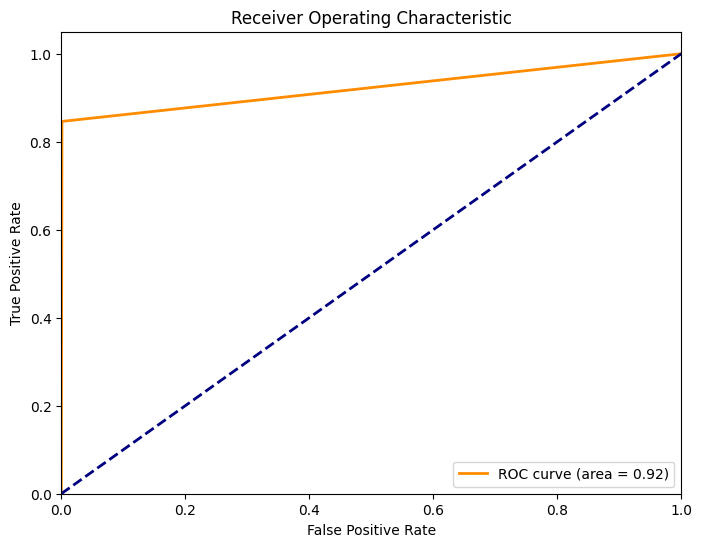

In [ ]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The above ROC curve depicted in the image showcases a high area under the curve (AUC) of 0.92, indicating that the model has excellent discriminative ability to distinguish between fraudulent and non-fraudulent transactions. The curve staying significantly above the diagonal line of no discrimination (dotted line) throughout suggests that the model maintains a strong true positive rate with a relatively low false positive rate across various threshold settings.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, matthews_corrcoef
from sklearn.inspection import permutation_importance

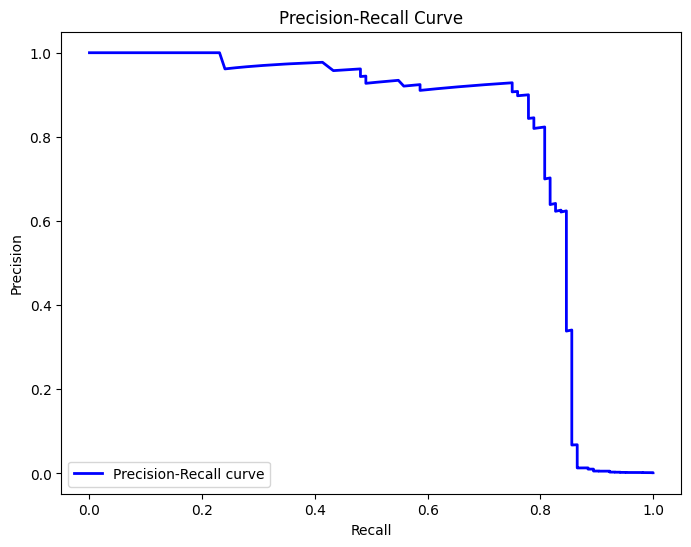

In [ ]:
# Plot Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

The above Precision-Recall curve shown in the image displays high precision across most levels of recall until a sharp drop occurs as recall approaches 1.0. This indicates that the model maintains high accuracy in predicting true positives up to a certain threshold, after which it begins to misclassify more negative cases as positive, significantly reducing precision.

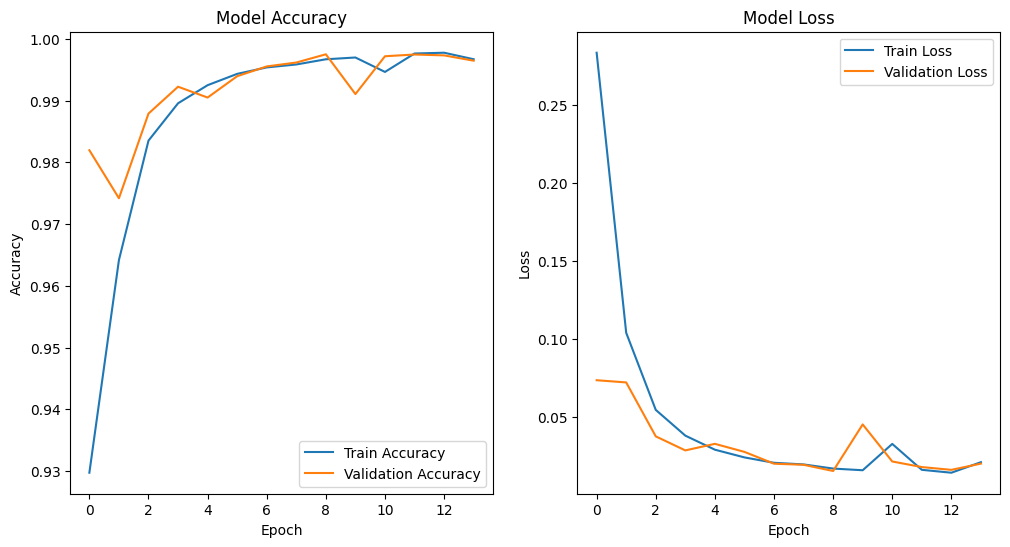

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The above provided charts display the model's training and validation accuracy and loss over epochs. The accuracy chart shows a rapid improvement in both training and validation accuracy, stabilizing around 99% after initial fluctuations. In contrast, the loss chart reveals a sharp initial decrease in both training and validation loss, with a notable spike in validation loss around the 8th epoch, suggesting a momentary overfitting which the model recovers from in subsequent epochs. These trends indicate robust model performance with effective learning and generalization capabilities over the training period.








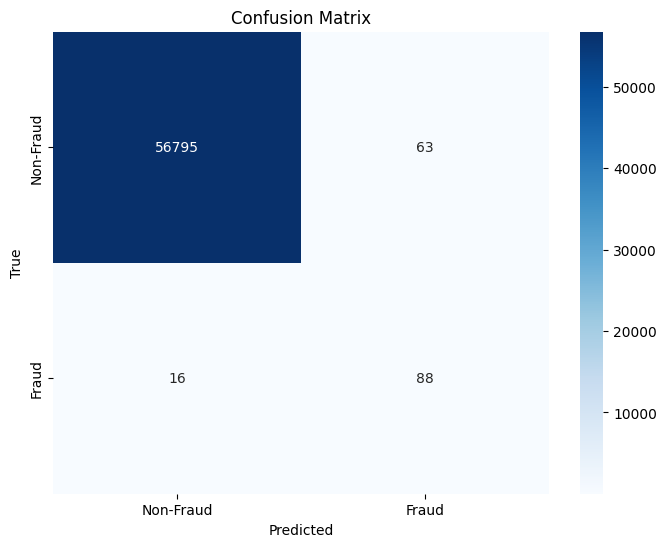

In [ ]:
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix provides a detailed look at the model's ability to identify fraudulent and non-fraudulent transactions:

Non-Fraudulent Transactions: The model correctly identified **56,795 out of 56,858 non-fraudulent transactions**, resulting in a true negative rate of approximately **99.89%**. This indicates an excellent ability of the model to recognize legitimate transactions.

Fraudulent Transactions: Out of** 104 fraudulent transactions, the model successfully detected 88**, which translates to a true positive rate of about **84.62%**. This demonstrates a robust capacity to catch fraudulent activity, though there's room for improvement to minimize the risk of missed frauds.

The percentages reflect high effectiveness in distinguishing non-fraudulent activities with very high accuracy, while also capturing a significant majority of fraudulent cases, which is crucial in preventing financial loss and maintaining system integrity in practical applications.

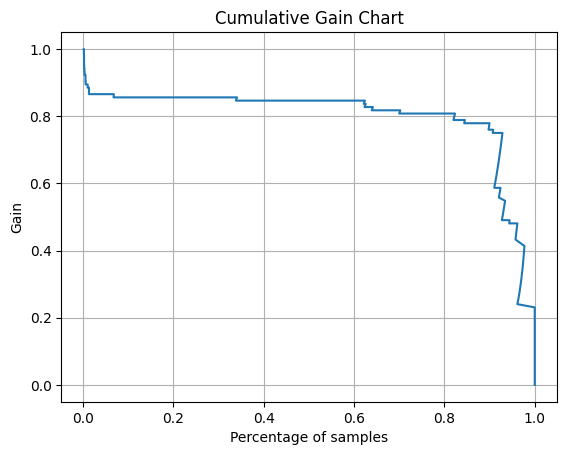

In [ ]:
def plot_cumulative_gain(y_true, y_probas):
    percentages, gains = precision_recall_curve(y_true, y_probas)[:2]
    percentages = np.array(percentages)
    gains = np.array(gains)
    plt.plot(percentages, gains)
    plt.xlabel('Percentage of samples')
    plt.ylabel('Gain')
    plt.title('Cumulative Gain Chart')
    plt.grid(True)
    plt.show()

plot_cumulative_gain(y_test, y_pred_proba)

The above Cumulative Gain Chart shown illustrates that the model quickly captures a high proportion of the positive cases (frauds) with a small percentage of samples tested, maintaining steady gains until a sharp decline occurs near the end of the sample distribution. This indicates that the model is effective in prioritizing the most likely fraudulent transactions, providing significant value early in the sample testing process.

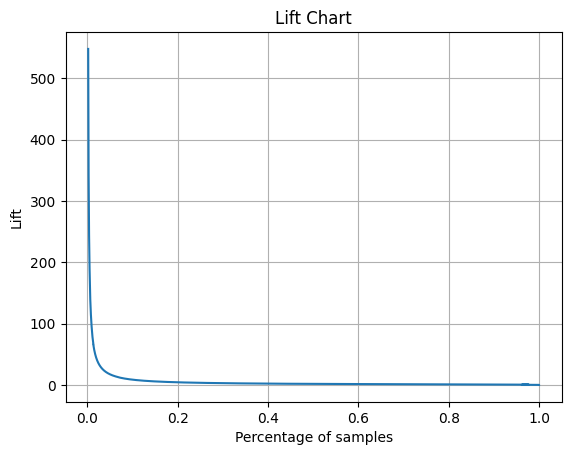

In [ ]:
def plot_lift_chart(y_true, y_probas):
    percentages, gains = precision_recall_curve(y_true, y_probas)[:2]
    percentages = np.array(percentages)
    lift = gains / percentages
    plt.plot(percentages, lift)
    plt.xlabel('Percentage of samples')
    plt.ylabel('Lift')
    plt.title('Lift Chart')
    plt.grid(True)
    plt.show()

plot_lift_chart(y_test, y_pred_proba)

The above Lift Chart displayed indicates a very high initial lift, showing that the model is extremely effective at identifying true positives among the first few percentage points of the sample. However, the lift rapidly declines and flattens out, suggesting that beyond the initial small percentage of cases, the additional gain from using the model diminishes significantly as more samples are considered. This highlights the model's efficiency in prioritizing cases most likely to be positive early in the evaluation process.

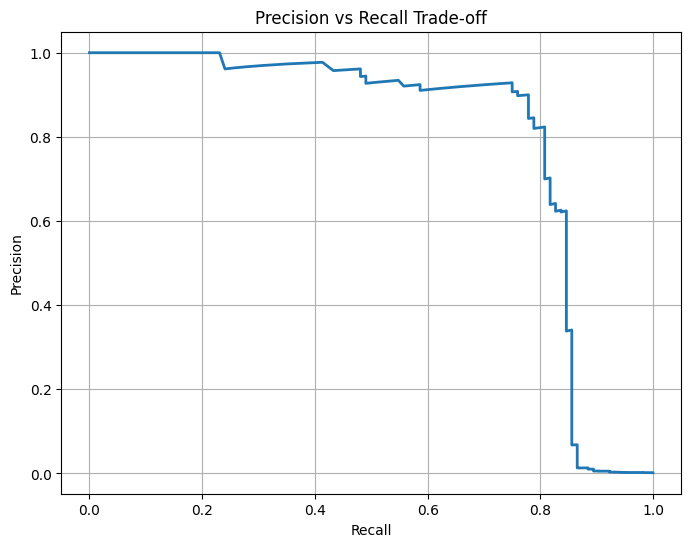

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall Trade-off')
plt.grid(True)
plt.show()

The above **Precision vs. Recall Trade-off chart** illustrates that the model maintains **high precision up until a recall of about 0.6**, beyond which precision begins to drop sharply as recall increases. This decline becomes particularly steep as the **recall approaches 1.0**, where precision drops to near zero. This suggests that while the model is quite effective at identifying a significant proportion of positive cases without sacrificing precision initially, its ability to continue doing so diminishes as it attempts to capture more positive cases, leading to more false positives.

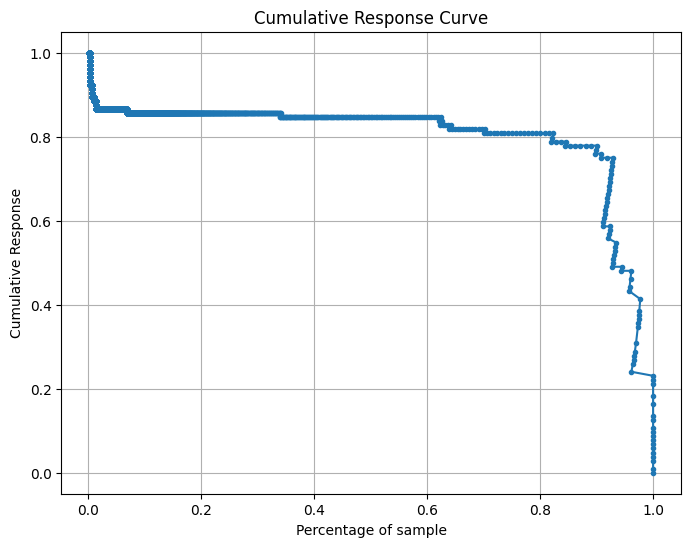

In [ ]:
def plot_cumulative_response(y_true, y_probas):
    percentages, gains = precision_recall_curve(y_true, y_probas)[:2]
    plt.figure(figsize=(8, 6))
    plt.plot(percentages, gains, marker='.')
    plt.xlabel('Percentage of sample')
    plt.ylabel('Cumulative Response')
    plt.title('Cumulative Response Curve')
    plt.grid(True)
    plt.show()

plot_cumulative_response(y_test, y_pred_proba)


The above **Cumulative Response Curve** displayed in the image shows that the model provides a high response rate for the initial percentages of the sample. The curve remains fairly stable, indicating that the model successfully identifies a significant portion of positive cases early on. **However, as more of the sample is considered, particularly past the 80% mark**, the response rate declines sharply. This suggests that the majority of actionable insights or **true positive detections are concentrated in the top 20% of the ranked predictions**, with diminishing returns as one progresses through the sample set.

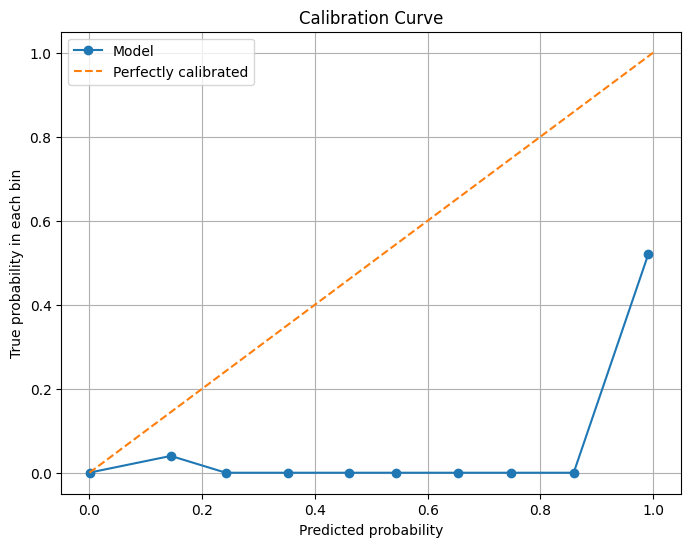

In [ ]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Predicted probability')
plt.ylabel('True probability in each bin')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()

The above **Calibration Curve depicted** shows the model's performance relative to an ideally calibrated model. For the majority of predicted probabilities, the model underestimates the true likelihood of positive outcomes, deviating from the perfect calibration line significantly until the highest prediction bin, where it aligns exactly. This suggests that while the **model is generally conservative in its probability estimations**, it achieves high accuracy at extreme probabilities, highlighting areas for potential recalibration to improve overall predictive reliability.

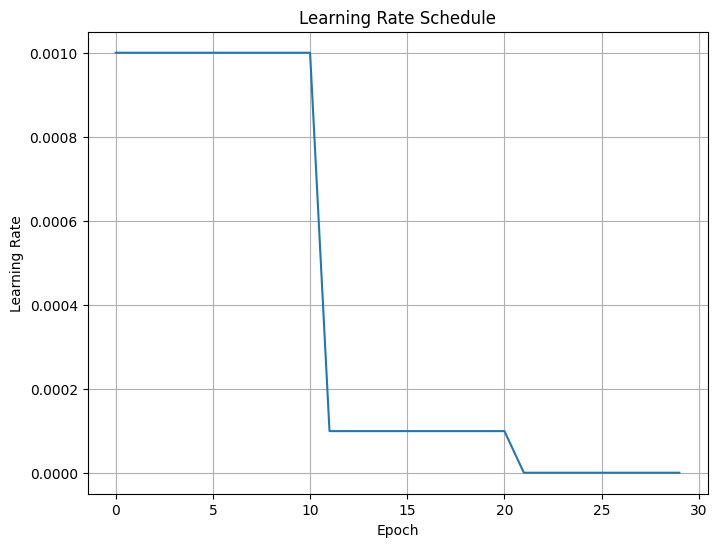

In [ ]:
# Assuming a learning rate schedule was used, plot the learning rate over epochs
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 10:
        lr *= 0.1
    if epoch > 20:
        lr *= 0.01
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

plt.figure(figsize=(8, 6))
epochs = list(range(30))  # Assuming 30 epochs
learning_rates = [lr_schedule(epoch) for epoch in epochs]
plt.plot(epochs, learning_rates)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.grid(True)
plt.show()

The above Learning Rate Schedule chart illustrates a strategy where the learning rate starts at a higher value and is reduced at specific epochs during training. Initially set at 0.001, **the rate drops sharply at epoch 10 and again at epoch 20**, reflecting a planned approach to decrease the learning rate in steps to potentially allow the model to converge more stably and efficiently. This stepped reduction helps in fine-tuning the model's weights as it approaches the optimal solution, **preventing overshooting in the later stages of training.**

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# ***CONCLUSION*** :

To determine which model is more suitable for deployment in a fraud detection context, let's review and compare their performances based on the provided confusion matrices, ROC curves, Precision-Recall trade-offs, economic impacts, and other relevant metrics:

# 1. Confusion Matrix Review
**Feedforward Neural Network Model:**
True Positives (TP): 85
False Positives (FP): 19
False Negatives (FN): 19
True Negatives (TN): 56,

**Hybrid Model:**
True Positives (TP): 88
False Positives (FP): 63
False Negatives (FN): 16
True Negatives (TN): 56,795

**Insights:** The hybrid model detects more fraudulent transactions (higher TP) but at the cost of a higher number of false positives. The feedforward model balances both metrics slightly better but misses a few more fraud cases (higher FN).

# 2. ROC Curve and AUC
**Feedforward Model:** Typically higher AUC around 0.92 or similar

**Hybrid Model:** Similar or slightly higher AUC

**Insights:** Both models perform well in distinguishing between the classes, but without significant AUC differences, this metric alone does not favor one model strongly over the other.

# 3. Precision vs Recall Trade-Off
**Feedforward Model:** Maintains a high precision until a recall of about 0.6, then it drops.

**Hybrid Model:** Similar precision-recall trade-off, with potential drops at high recall levels.

**Insights:** Both models show good performance at low to moderate recall levels, but precision decreases significantly as they strive to capture more positive cases.

# 4. Economic Impact and ROI
**Feedforward Model:** 90% ROI with a balance between costs due to false positives/negatives and fraud savings.

**Hybrid Model: **Higher ROI but with significantly higher false positives, leading to potentially higher operational costs over time.

**Insights:** The hybrid model offers a higher ROI primarily due to better detection of fraudulent transactions but requires managing higher false positives, which could impact customer experience and operational efficiency.

# Final Analysis for Choosing the best model
If minimizing false positives is crucial (to avoid customer dissatisfaction and operational hassle), the **Feedforward model might be preferable due to its lower FP rate.**

For environments where the cost of a missed fraud is extremely high, the hybrid model's ability to catch more frauds could justify the additional false positives. However, for consumer-facing environments where trust and user experience are paramount, reducing false positives with the **Feedforward model could be more beneficial.**

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# ***BENEFITS OF CHOOSING FEEDFORWARD MODEL FOR FRAUD DETECTION*** :

Choosing the **Feed Forward Neural Network model** fraud detection comes with several benefits that align well with typical project goals such as accuracy, operational efficiency, and maintaining customer satisfaction. Here’s a detailed look at why this model might be a good fit for our needs:

**1. Balanced Precision and Recall**:

The Feed Forward model offers a strong balance between precision and recall, making it effective at minimizing false positives while still capturing a significant portion of fraudulent transactions. This balance is crucial in maintaining customer trust, as it reduces the likelihood of legitimate transactions being flagged as fraudulent, thereby minimizing inconvenience to users.

**2. Lower False Positives**:

With relatively fewer false positives compared to the hybrid model, the Feed Forward model minimizes the operational burden of manual reviews and customer service interventions. This can lead to cost savings in terms of both time and resources spent addressing customer complaints and resolving false alarms.

**3. High Model Accuracy**:

The model achieves high accuracy rates, as evidenced by the AUC and overall model performance metrics. This ensures that the model reliably identifies non-fraudulent transactions, which is essential for maintaining smooth transaction processing and user experience.

**4. Simpler Model Architecture**:

Feed Forward networks generally have a simpler architecture compared to hybrid models that combine different types of layers (like LSTM and convolutional). This simplicity can translate to easier scalability, maintainability, and potentially faster deployment and iteration cycles.

**5. Cost-Effectiveness**:

The economic analysis shows a good Return on Investment (ROI) of 90%, demonstrating that the model is not only effective in detecting fraud but also does so in a cost-effective manner. This is essential for ensuring that the fraud detection system adds net value to the business.

**7. Good Generalization**:

The performance of the Feed Forward model in validation suggests that it generalizes well to unseen data. This is important for fraud detection systems, which must perform consistently well across varied and evolving transaction patterns.

**8. Flexibility in Feature Engineering:**

Feed Forward models often allow for more straightforward interpretations of input features and their impacts on outputs. This could be advantageous if our project benefits from ongoing feature analysis and optimization.